In [4]:
#---Transportation energy in WECC projected by GCAM over years and decarbonizatuon path---
#---by vehcicle types and GCAM ectors---

import os
import pandas as pd
import numpy as np


EJ_to_TWh                = 1e6*0.000277778 #1e12*0.000277778
wecc_states              = ['AZ', 'CA', 'CO', 'ID', 'MT', 'NV', 'NM', 'OR', 'UT', 'WA', 'WY']

years                    = [2025, 2030, 2035, 2040, 2045, 2050]
GCAM_cases               = ['NetZeroNoCCS_Climate','BAU_Climate'] 


#--- Calculating Energy for Subsectors---

df_subsector_energy      = pd.DataFrame()

for year in years:

    for case in GCAM_cases:
   
        energy_by_mode_and_fuel = pd.read_csv(os.path.join('..', 'input', 'transportation_energy_output_godeeep_' + case +'.csv'))
        
        subsectors          = energy_by_mode_and_fuel.subsector.unique()
        MWh_subsectors      = [] 

        for subsector in subsectors:

            energy_ev = energy_by_mode_and_fuel[(energy_by_mode_and_fuel['input'] == 'elect_td_trn') 
                            & energy_by_mode_and_fuel['subsector'].isin([subsector])]

            energy_ev_wecc          = energy_ev[energy_ev['region'].isin(wecc_states)].reset_index(drop=True)
            energy_ev_wecc_year     = energy_ev_wecc[energy_ev_wecc['Year'].isin([year])].reset_index(drop=True)
            MWh_ev_wecc             = energy_ev_wecc_year['value'].sum()*EJ_to_TWh 
            MWh_ev_wecc

            MWh_subsectors.append(MWh_ev_wecc) 
            
            
        df_subsector_energy['subsector'] = subsectors
        col_name = str(year) + '_' + case
        df_subsector_energy[col_name] = MWh_subsectors

                                        
df_subsector_energy.to_csv(os.path.join('..', 'input', 'subsectors_energy_in_TWh.csv'), index=False)
display("Energy by GCAM subsector:",  df_subsector_energy)


#--- Calculating Energy for Vehicle Type---

ldv      = ['2W and 3W', 'Car', 'Large Car and Truck', 'Mini Car', 'Light truck']

mdv      = ['Medium truck']

hdv      = ['Bus', 'Heavy truck']

Non_road = ['International Aviation', 'Domestic Ship', 'Freight Rail', 'Domestic Aviation', 'HSR', 'Passenger Rail', 'International Ship']
 
vechtypes          = {}
vech_type_energy   = []
vechtypes          = dict({"ldv": ldv, "mdv": mdv, "hdv": hdv, "Non_road": Non_road})

for vechtype, vech_list in vechtypes.items():
    
    vech_group     = (df_subsector_energy[df_subsector_energy['subsector'].isin(vech_list)]).set_index('subsector')
#     print(vech_group)
    sum_vech_group = vech_group.iloc[:,:].sum()
#     print(sum_vech_group)
    vech_type_energy.append(np.array(sum_vech_group))
#     print(vech_type_energy)
df_vechtype_energy = pd.DataFrame(vech_type_energy, index = list(vechtypes.keys()), columns = list(sum_vech_group.index))
df_vechtype_energy.reset_index(inplace=True)

display("Energy by Vechicle Type:", df_vechtype_energy)

#---write the penetrations in .csv---
                                        
df_vechtype_energy.to_csv(os.path.join('..', 'input', 'vech_type_energy_in_TWh.csv'), index=False)



#---Calculating Energy for Vehicle Types All----


ldv      = ['2W and 3W', 'Car', 'Large Car and Truck', 'Mini Car', 'Light truck']

mdv      = ['Medium truck']

hdv      = ['Bus', 'Heavy truck']

rail     = [ 'Freight Rail', 'HSR', 'Passenger Rail']

aviation = ['International Aviation',  'Domestic Aviation']

ship     = [ 'Domestic Ship', 'International Ship']
 
vechtypes          = {}
vech_type_energy   = []
vechtypes          = dict({"ldv": ldv, "mdv": mdv, "hdv": hdv, "rail": rail, "aviation": aviation, "ship": ship})

for vechtype, vech_list in vechtypes.items():
    
    vech_group     = (df_subsector_energy[df_subsector_energy['subsector'].isin(vech_list)]).set_index('subsector')
#     print(vech_group)
    sum_vech_group = vech_group.iloc[:,:].sum()
#     print(sum_vech_group)
    vech_type_energy.append(np.array(sum_vech_group))
#     print(vech_type_energy)
df_vechtype_energy = pd.DataFrame(vech_type_energy, index = list(vechtypes.keys()), columns = list(sum_vech_group.index))
df_vechtype_energy.reset_index(inplace=True)

display("Energy by Vechicle Type All:", df_vechtype_energy)

#---write the penetrations in .csv---
                                        
df_vechtype_energy.to_csv(os.path.join('..', 'input', 'vech_type_all_energy_in_TWh.csv'), index=False)

'Energy by GCAM subsector:'

,subsector,2025_NetZeroNoCCS_Climate,2025_BAU_Climate,2030_NetZeroNoCCS_Climate,2030_BAU_Climate,2035_NetZeroNoCCS_Climate,2035_BAU_Climate,2040_NetZeroNoCCS_Climate,2040_BAU_Climate,2045_NetZeroNoCCS_Climate,2045_BAU_Climate,2050_NetZeroNoCCS_Climate,2050_BAU_Climate
0,International Aviation,0.000000,0.000000,0.000000,0.000000,0.000034,0.000028,0.000595,0.000227,0.020774,0.001781,1.092906,0.012497
1,Domestic Ship,0.000000,0.000000,0.000000,0.000000,0.173288,0.122758,3.991467,0.380875,21.344378,1.194057,19.368815,2.674024
2,Freight Rail,0.333346,0.324525,1.435618,1.401324,3.013464,2.925501,4.448722,3.828773,5.215940,4.344373,5.543805,4.709868
3,Heavy truck,2.857153,2.857153,10.087391,10.087391,9.065961,9.065961,8.232477,8.232477,7.539347,7.539347,6.953788,6.953788
4,Light truck,4.451101,3.585565,8.892165,7.105997,14.752200,11.904868,22.827059,16.786137,31.341214,20.623711,38.355385,23.842101
5,Medium truck,2.131604,2.131604,6.342237,6.342237,6.050248,6.050248,5.784158,5.784158,5.540211,5.540211,5.316287,5.316287
6,Domestic Aviation,0.000000,0.000000,0.000000,0.000000,1.200622,1.028308,6.499124,2.643056,44.020089,6.534890,87.145880,14.125547
7,HSR,0.176557,0.179624,0.253333,0.260221,0.354793,0.373390,0.513028,0.543527,0.701801,0.756662,0.922788,1.020688
8,Passenger Rail,1.173589,1.183354,1.064484,1.079359,1.083313,1.110728,1.128782,1.144162,1.183551,1.174093,1.250653,1.201190
9,Bus,0.467329,0.453911,0.738853,0.718502,1.015308,0.978010,1.222554,1.145875,1.390813,1.248431,1.501749,1.276094


'Energy by Vechicle Type:'

,index,2025_NetZeroNoCCS_Climate,2025_BAU_Climate,2030_NetZeroNoCCS_Climate,2030_BAU_Climate,2035_NetZeroNoCCS_Climate,2035_BAU_Climate,2040_NetZeroNoCCS_Climate,2040_BAU_Climate,2045_NetZeroNoCCS_Climate,2045_BAU_Climate,2050_NetZeroNoCCS_Climate,2050_BAU_Climate
0,ldv,34.577254,32.090874,67.649470,63.679100,111.145170,104.154108,156.927834,136.080022,210.938452,165.912282,258.660972,187.465649
1,mdv,2.131604,2.131604,6.342237,6.342237,6.050248,6.050248,5.784158,5.784158,5.540211,5.540211,5.316287,5.316287
2,hdv,3.324482,3.311064,10.826244,10.805893,10.081268,10.043970,9.455030,9.378351,8.930160,8.787779,8.455537,8.229883
3,Non_road,1.683492,1.687503,2.753435,2.740904,5.840431,5.570952,16.872186,8.573149,86.808708,14.114932,133.113116,24.020016


'Energy by Vechicle Type All:'

,index,2025_NetZeroNoCCS_Climate,2025_BAU_Climate,2030_NetZeroNoCCS_Climate,2030_BAU_Climate,2035_NetZeroNoCCS_Climate,2035_BAU_Climate,2040_NetZeroNoCCS_Climate,2040_BAU_Climate,2045_NetZeroNoCCS_Climate,2045_BAU_Climate,2050_NetZeroNoCCS_Climate,2050_BAU_Climate
0,ldv,34.577254,32.090874,67.649470,63.679100,111.145170,104.154108,156.927834,136.080022,210.938452,165.912282,258.660972,187.465649
1,mdv,2.131604,2.131604,6.342237,6.342237,6.050248,6.050248,5.784158,5.784158,5.540211,5.540211,5.316287,5.316287
2,hdv,3.324482,3.311064,10.826244,10.805893,10.081268,10.043970,9.455030,9.378351,8.930160,8.787779,8.455537,8.229883
3,rail,1.683492,1.687503,2.753435,2.740904,4.451570,4.409619,6.090531,5.516463,7.101292,6.275128,7.717246,6.931746
4,aviation,0.000000,0.000000,0.000000,0.000000,1.200655,1.028336,6.499719,2.643283,44.040862,6.536671,88.238786,14.138044
5,ship,0.000000,0.000000,0.000000,0.000000,0.188205,0.132997,4.281935,0.413403,35.666554,1.303133,37.157084,2.950226


In [5]:
#---Transportation energy in GCAM in WECC by mode of fuel---

import os
import pandas as pd
import numpy as np


EJ_to_TWh                = 1e6*0.000277778 #1e12*0.000277778
wecc_states              = ['AZ', 'CA', 'CO', 'ID', 'MT', 'NV', 'NM', 'OR', 'UT', 'WA', 'WY']

years                    = [2025, 2030, 2035, 2040, 2045, 2050]
GCAM_cases               = ['NetZeroNoCCS_Climate','BAU_Climate'] 

energy_mode              = ['elect_td_trn', 'H2 wholesale dispensing','refined liquids enduse', 'H2 retail dispensing', 
                                             'delivered gas', 'delivered coal']

#--- Calculating Energy for Subsectors---

df_trans_energy_mode      = pd.DataFrame()

for year in years:

    for case in GCAM_cases:
   
        energy_by_mode_and_fuel = pd.read_csv(os.path.join('..', 'input', 'transportation_energy_output_godeeep_' + case +'.csv'))
        subsectors          = energy_by_mode_and_fuel.subsector.unique()
        EJ_energy_mode      = [] 

        for mode in energy_mode:

            energy_trans               = energy_by_mode_and_fuel[(energy_by_mode_and_fuel['input'] == mode)]

            energy_trans_wecc          = energy_trans[energy_trans['region'].isin(wecc_states)].reset_index(drop=True)
            energy_trans_wecc_year     = energy_trans_wecc[energy_trans_wecc['Year'].isin([year])].reset_index(drop=True)
            EJ_trans_wecc              = energy_trans_wecc_year['value'].sum()*1 
            EJ_trans_wecc

            EJ_energy_mode.append(EJ_trans_wecc) 
            
            
        df_trans_energy_mode['energy_mode'] = energy_mode 
        col_name = str(year) + '_' + case
        df_trans_energy_mode[col_name] = EJ_energy_mode

                                        
df_trans_energy_mode.to_csv(os.path.join('..', 'input', 'transportation_energy_in_EJ.csv'), index=False)
display("Transporation Energy by Fuel Mode:", df_trans_energy_mode)

'Transporation Energy by Fuel Mode:'

,energy_mode,2025_NetZeroNoCCS_Climate,2025_BAU_Climate,2030_NetZeroNoCCS_Climate,2030_BAU_Climate,2035_NetZeroNoCCS_Climate,2035_BAU_Climate,2040_NetZeroNoCCS_Climate,2040_BAU_Climate,2045_NetZeroNoCCS_Climate,2045_BAU_Climate,2050_NetZeroNoCCS_Climate,2050_BAU_Climate
0,elect_td_trn,0.150180,0.141196,0.315257,0.300845,0.479221,0.452949,0.680541,0.575336,1.123982,0.699678,1.459964,0.810114
1,H2 wholesale dispensing,0.001646,0.001649,0.006338,0.006318,0.013781,0.014516,0.021576,0.022101,0.117220,0.033835,0.293032,0.054724
2,refined liquids enduse,5.101876,5.306369,4.201675,4.420331,3.538710,3.856155,2.822918,3.606080,1.385878,3.407131,0.392115,3.262546
3,H2 retail dispensing,0.010959,0.011229,0.042337,0.043303,0.083463,0.086722,0.149516,0.141239,0.424162,0.207205,0.743082,0.274641
4,delivered gas,0.009010,0.009036,0.006760,0.006794,0.005051,0.005168,0.003556,0.003896,0.002108,0.002945,0.000846,0.002424
5,delivered coal,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


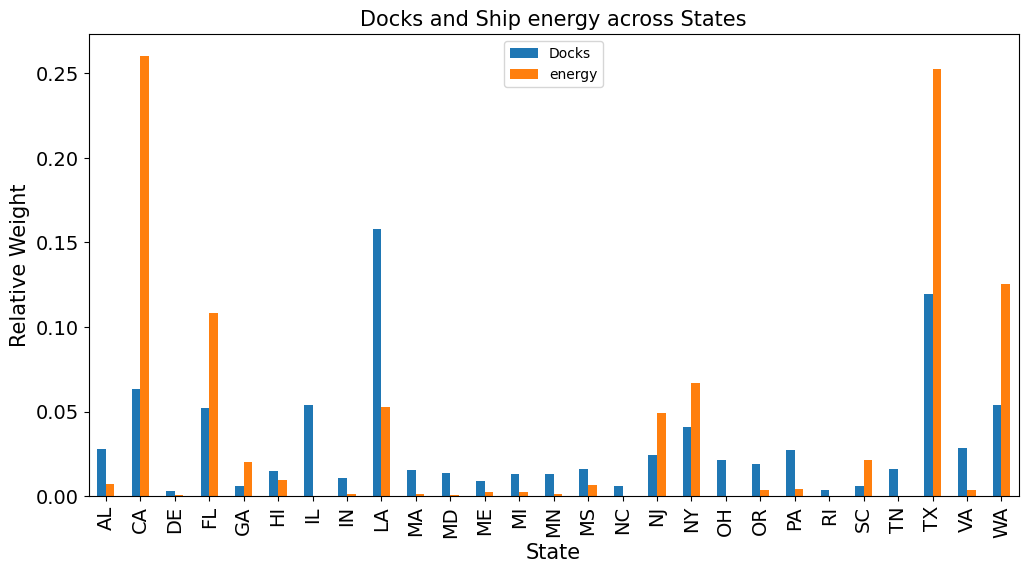

Correleation between Docks and Ship Energy in GCAM is: 0.6244738494927293


In [9]:
#---Corelation between Ship Energy in GCAM and and Docks in WECC States---

import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib.ticker import AutoMinorLocator

us_states        = ['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
                    'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY','LA', 'MA', 'MD', 'ME', 
                    'MI', 'MN', 'MO', 'MS', 'MT','NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 
                    'NV', 'NY', 'OH', 'OK','OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 
                    'UT', 'VA','VT', 'WA', 'WI', 'WV', 'WY']

wecc_states      = ['AZ', 'CA', 'CO', 'ID', 'MT', 'NV', 'NM', 'OR', 'UT', 'WA', 'WY']


us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}


# invert the dictionary
abbrev_to_us_state = dict(map(reversed, us_state_to_abbrev.items()))

#---- User-Defined Inputs----

year       = 2025

subsector  = ['Domestic Ship', 'International Ship']

GCAM_case  =  'NetZeroNoCCS_Climate' #{'NetZeroNoCCS_Climate','BAU_Climate'}



energy_by_mode_and_fuel = pd.read_csv(os.path.join('..', 'input', 'transportation_energy_output_godeeep_' + GCAM_case +'.csv'))

#---Ship Energy----
energy_ship                = energy_by_mode_and_fuel[energy_by_mode_and_fuel['subsector'].isin(subsector)]
energy_ship                = energy_ship[energy_ship['region'].isin(us_states)].reset_index(drop=True) # us_states or wecc_states
energy_ship_year           = energy_ship[energy_ship['Year'].isin([year])].reset_index(drop=True)

energy_ship_year           = energy_ship_year.groupby(by ='region').agg({'Year': 'mean', 'value': 'sum'})
energy_ship_year.reset_index(inplace=True)
energy_ship_year           = energy_ship_year.rename(columns = {'region':'State', 'value': 'energy'})
energy_ship_year['energy'] = energy_ship_year['energy']/energy_ship_year['energy'].sum()

# display("GCAM Ship Energy:", energy_ship_year)

#---Ship Docks---
docks_ships          = pd.read_csv(os.path.join('..', 'input', 'County_State_Dock.csv'))
docks_ships          = (docks_ships.filter(['State', 'Docks'], axis = 1)).iloc[0:51].dropna().reset_index(drop =True)
docks_ships['State'] = docks_ships['State'].replace(us_state_to_abbrev)
docks_ships['Docks'] = docks_ships['Docks']/docks_ships['Docks'].sum()

ship_us_final        = (energy_ship_year.merge(docks_ships, on ='State', how='left'))
# display("Merged:", ship_us_final)

#---Visualize and write the penetrations in .csv---
ax = ship_us_final.plot(x="State", y=["Docks", "energy"], kind="bar",figsize =(12,6), fontsize = 14)
ax.set_title(f'Docks and Ship energy across States', fontsize = 15)
ax.set_xlabel("State", fontsize = 15)
ax.set_ylabel("Relative Weight", fontsize = 15)
plot_fp  = os.path.join('..', 'input', f'ldv-mdv penetration bar plot.png')
plt.savefig(plot_fp, bbox_inches='tight', dpi=300)
plt.show()

#---Write the penetration to .csv.----
print("Correleation between Docks and Ship Energy in GCAM is:", ship_us_final['Docks'].corr(ship_us_final['energy']))

In [10]:
#--- Transportation Electric Energy by WECC States in GACAM---
import os
import pandas as pd
import numpy as np


EJ_to_TWh                = 1e6*0.000277778 #1e12*0.000277778
wecc_states              = ['AZ', 'CA', 'CO', 'ID', 'MT', 'NV', 'NM', 'OR', 'UT', 'WA', 'WY']

years                    = [2025, 2030, 2035, 2040, 2045, 2050]
GCAM_cases               = ['NetZeroNoCCS_Climate','BAU_Climate'] 


#--- Calculating Energy for Subsectors---

df_state_energy      = pd.DataFrame()

for year in years:

    for case in GCAM_cases:
   
        energy_by_mode_and_fuel = pd.read_csv(os.path.join('..', 'input', 'transportation_energy_output_godeeep_' + case +'.csv'))
        
        states          = energy_by_mode_and_fuel.region.unique()
        MWh_states      = [] 

        for state in wecc_states:
        
            energy_ev = energy_by_mode_and_fuel[(energy_by_mode_and_fuel['region'].isin([state]))] 
                            
            energy_ev = energy_ev[energy_ev['input'] == 'elect_td_trn']
            energy_ev_year     = energy_ev[energy_ev['Year'].isin([year])].reset_index(drop=True)
            MWh_ev_states       = energy_ev_year['value'].sum()*EJ_to_TWh 
            MWh_ev_states

            MWh_states.append(MWh_ev_states) 
            
            
        df_state_energy['State'] = wecc_states
        col_name = str(year) + '_' + case
        df_state_energy[col_name] = MWh_states

                                        
df_state_energy.to_csv(os.path.join('..', 'input', 'states_transportation_energy_in_TWh.csv'), index=False)
display("Transportation Electric Energy in WECC States:",  df_state_energy)

'Energy by WECC:'

,State,2025_NetZeroNoCCS_Climate,2025_BAU_Climate,2030_NetZeroNoCCS_Climate,2030_BAU_Climate,2035_NetZeroNoCCS_Climate,2035_BAU_Climate,2040_NetZeroNoCCS_Climate,2040_BAU_Climate,2045_NetZeroNoCCS_Climate,2045_BAU_Climate,2050_NetZeroNoCCS_Climate,2050_BAU_Climate
0,AZ,2.994989,2.815633,7.044454,6.739405,10.884933,10.355684,15.517526,13.482712,22.327238,16.548436,29.013348,18.958832
1,CA,23.376304,22.119120,45.621550,43.844224,69.364695,66.182772,97.898204,83.368595,168.223131,101.126072,220.914739,117.286513
2,CO,2.939800,2.770496,6.319768,6.056928,9.686768,9.241096,13.455033,11.784893,19.768437,14.261948,25.721996,16.286229
3,ID,0.954078,0.885822,2.399441,2.261191,3.557358,3.296401,4.963453,4.225993,6.951579,5.126272,8.848390,5.867384
4,MT,0.655563,0.608117,1.614790,1.520211,2.430599,2.253735,3.379606,2.887085,4.739691,3.492461,6.020618,4.006899
5,NV,1.254801,1.168616,2.866560,2.705553,4.527892,4.207583,6.493498,5.489155,9.978596,6.802557,13.438382,7.967221
6,NM,1.286020,1.201199,3.150779,2.996386,4.648730,4.393318,6.460021,5.606004,9.000914,6.729788,11.376224,7.636550
7,OR,2.853112,2.662722,5.989635,5.669496,8.807341,8.255979,11.668707,10.197845,16.028134,11.994361,19.598644,13.414947
8,UT,1.456364,1.357219,3.472504,3.276328,5.238530,4.853258,7.476564,6.263619,11.669868,7.718361,15.882193,9.055627
9,WA,3.391247,3.118621,7.632539,7.118888,11.944074,10.881870,18.983925,14.149203,39.779409,17.789415,50.036273,21.440061
